# Synthetic vs. real data comparison

In [1]:
import numpy as np
import jax.numpy as jnp
import jax


from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.pyplot as plt
import nmu
from circuitmap import NeuralDemixer

import sys
sys.path.append('../')
import grid_utils as util
import subtract_utils as subtract_utils
import os
import glob
import pc_subtractr_network

plt.rcParams['figure.dpi'] = 300

In [2]:
data_path = '../data/masato/B6WT_AAV_hsyn_chrome2f_gcamp8/preprocessed/'
files = glob.glob(data_path + '*.npz')
print(files)

['../data/masato/B6WT_AAV_hsyn_chrome2f_gcamp8/preprocessed/220308_B6_Chrome2fGC8_030822_Cell2_opsPositive_A_grid.npz', '../data/masato/B6WT_AAV_hsyn_chrome2f_gcamp8/preprocessed/220314_WT_Chrome2fGC8_IV_031422_MultispotGrid_Cell3_opsPositive_A_planes.npz', '../data/masato/B6WT_AAV_hsyn_chrome2f_gcamp8/preprocessed/220308_B6_Chrome2fGC8_030822_Cell1_OpsPositive_A_planes.npz', '../data/masato/B6WT_AAV_hsyn_chrome2f_gcamp8/preprocessed/220308_B6_Chrome2fGC8_030822_Cell2_opsPositive_A_planes.npz', '../data/masato/B6WT_AAV_hsyn_chrome2f_gcamp8/preprocessed/220314_WT_Chrome2fGC8_IV_031422_MultispotGrid_Cell3_opsPositive_A_grid.npz', '../data/masato/B6WT_AAV_hsyn_chrome2f_gcamp8/preprocessed/220314_WT_Chrome2fGC8_IV_031422_MultispotGrid_Cell1_opsPositive_A_planes.npz']


Trace generation:   0%|          | 0/3500 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:02<00:00,  2.33it/s]


Trace generation: 0it [00:00, ?it/s]

0it [00:00, ?it/s]


Text(0, 0.5, 'Synthetic')

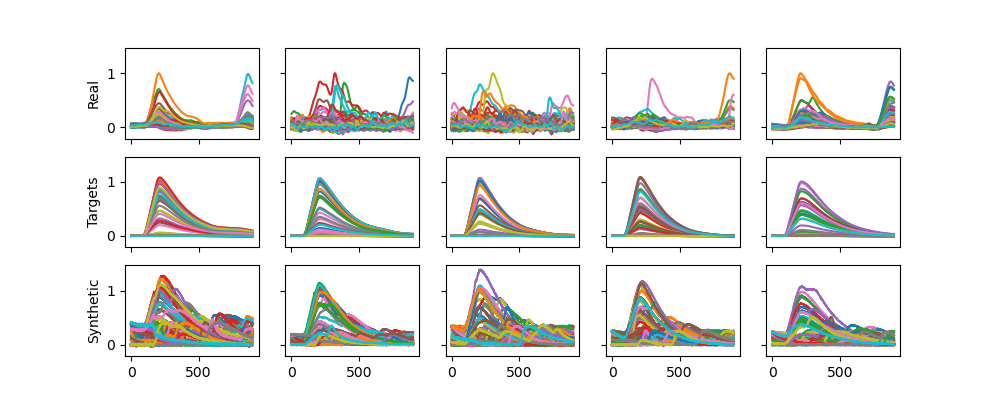

In [9]:
%matplotlib widget

# set number of datasets to plot
ndsets = 5
fig, axs = plt.subplots(nrows=3, ncols=ndsets, figsize=(ndsets * 2,4), sharex=True, sharey=True)

# generate synthetic data from the pc_subtractr_network
demixer_args = pc_subtractr_network.parse_args(['--num_train', str(ndsets), '--num_test', '0',
    '--psc_scale_max', '0.5',
    '--psc_generation_kwargs', 'noise_std_upper=0.02'])
pc_demixer = pc_subtractr_network.Subtractr(args=demixer_args)
pc_demixer.generate_training_data(args=demixer_args)

for i in range(ndsets):
    # Load real data and plot random collection of 100 pscs
    full_path = files[i]
    dat = np.load(full_path, allow_pickle='True')
    pscs, I, L = dat['psc'], dat['I'], dat['L']
    idxs = np.random.randint(low=0, high=pscs.shape[0], size=100)
    these_pscs = pscs[idxs]
    these_pscs /= np.max(these_pscs)
    axs[0,i].plot(these_pscs.T)

    # also plot some synthetically generated photocurrents
    inputs, targets = pc_demixer.train_expts[i]
    axs[1,i].plot(targets[0:100].T)
    axs[2,i].plot(inputs[0:100].T)

axs[0,0].set_ylabel('Real')
axs[1,0].set_ylabel('Targets')
axs[2,0].set_ylabel('Synthetic')


In [4]:
demixer_args.psc_generation_kwargs

{'noise_std_upper': 0.02}